# Gerador de CQT (Constant-Q Transform)

Este notebook contém um script completo para gerar o CQT de arquivos de áudio e representação em forma de tokens de um MIDI.



In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import os
from pathlib import Path

def generate_cqt(audio_file_path, sr=22050, hop_length=512, fmin=None, n_bins=84, bins_per_octave=12):
    """
    Gera o Constant-Q Transform (CQT) de um arquivo de áudio
    
    Parâmetros:
    - audio_file_path: caminho para o arquivo de áudio
    - sr: taxa de amostragem (default: 22050 Hz)
    - hop_length: tamanho do hop em samples (default: 512)
    - fmin: frequência mínima (default: C1 ≈ 32.7 Hz)
    - n_bins: número total de bins de frequência (default: 84, equivale a 7 oitavas)
    - bins_per_octave: bins por oitava (default: 12, um por semitom)
    
    Retorna:
    - cqt: matriz CQT complexa
    - sr: taxa de amostragem utilizada
    - times: array de tempos correspondentes aos frames
    """
    
    # Verifica se o arquivo existe
    if not os.path.exists(audio_file_path):
        raise FileNotFoundError(f"Arquivo não encontrado: {audio_file_path}")
    
    print(f"Carregando áudio: {audio_file_path}")
    
    # Carrega o áudio
    y, original_sr = librosa.load(audio_file_path, sr=sr)
    
    print(f"Duração: {len(y)/sr:.2f} segundos")
    print(f"Taxa de amostragem: {sr} Hz")
    
    # Define frequência mínima se não especificada
    if fmin is None:
        fmin = librosa.note_to_hz('C1')  # C1 ≈ 32.7 Hz
    
    print(f"Calculando CQT...")
    print(f"- Frequência mínima: {fmin:.2f} Hz")
    print(f"- Número de bins: {n_bins}")
    print(f"- Bins por oitava: {bins_per_octave}")
    
    # Calcula o CQT
    cqt = librosa.cqt(y, sr=sr, hop_length=hop_length, fmin=fmin, 
                      n_bins=n_bins, bins_per_octave=bins_per_octave)
    
    # Calcula os tempos correspondentes aos frames
    times = librosa.times_like(cqt, sr=sr, hop_length=hop_length)
    
    print(f"CQT calculado com sucesso!")
    print(f"Forma do CQT: {cqt.shape}")
    
    return cqt, sr, times


In [3]:
def visualize_cqt(cqt, sr, times, fmin=None, bins_per_octave=12, title="Constant-Q Transform"):
    """
    Visualiza o CQT como um espectrograma
    
    Parâmetros:
    - cqt: matriz CQT complexa
    - sr: taxa de amostragem
    - times: array de tempos
    - fmin: frequência mínima
    - bins_per_octave: bins por oitava
    - title: título do gráfico
    """
    
    if fmin is None:
        fmin = librosa.note_to_hz('C1')
    
    # Converte para magnitude em dB
    cqt_db = librosa.amplitude_to_db(np.abs(cqt), ref=np.max)
    
    # Cria o gráfico
    plt.figure(figsize=(12, 8))
    
    # Plota o CQT
    librosa.display.specshow(cqt_db, sr=sr, x_axis='time', y_axis='cqt_hz',
                            fmin=fmin, bins_per_octave=bins_per_octave,
                            cmap='viridis')
    
    plt.colorbar(label='Magnitude (dB)')
    plt.title(title)
    plt.xlabel('Tempo (s)')
    plt.ylabel('Frequência (Hz)')
    plt.tight_layout()
    plt.show()

def save_cqt(cqt, output_path, format='npy'):
    """
    Salva o CQT em arquivo
    
    Parâmetros:
    - cqt: matriz CQT
    - output_path: caminho de saída
    - format: formato do arquivo ('npy', 'npz', 'csv')
    """
    
    output_path = Path(output_path)
    
    if format == 'npy':
        # Salva como arquivo numpy
        np.save(output_path.with_suffix('.npy'), cqt)
        print(f"CQT salvo em: {output_path.with_suffix('.npy')}")
        
    elif format == 'npz':
        # Salva magnitude e fase separadamente
        magnitude = np.abs(cqt)
        phase = np.angle(cqt)
        np.savez(output_path.with_suffix('.npz'), 
                magnitude=magnitude, phase=phase)
        print(f"CQT salvo em: {output_path.with_suffix('.npz')}")
        
    elif format == 'csv':
        # Salva apenas a magnitude como CSV
        magnitude = np.abs(cqt)
        np.savetxt(output_path.with_suffix('.csv'), magnitude, delimiter=',')
        print(f"Magnitude do CQT salva em: {output_path.with_suffix('.csv')}")
        
    else:
        raise ValueError(f"Formato não suportado: {format}")

def load_cqt(file_path):
    """
    Carrega um CQT salvo
    
    Parâmetros:
    - file_path: caminho do arquivo
    
    Retorna:
    - cqt: matriz CQT carregada
    """
    
    file_path = Path(file_path)
    
    if file_path.suffix == '.npy':
        cqt = np.load(file_path)
        print(f"CQT carregado de: {file_path}")
        return cqt
        
    elif file_path.suffix == '.npz':
        data = np.load(file_path)
        magnitude = data['magnitude']
        phase = data['phase']
        cqt = magnitude * np.exp(1j * phase)
        print(f"CQT carregado de: {file_path}")
        return cqt
        
    else:
        raise ValueError(f"Formato de arquivo não suportado: {file_path.suffix}")


=== Gerador de CQT ===
Processando: unaligned_rocky.mp3

Carregando áudio: unaligned_rocky.mp3
Duração: 171.31 segundos
Taxa de amostragem: 22050 Hz
Calculando CQT...
- Frequência mínima: 32.70 Hz
- Número de bins: 84
- Bins por oitava: 12
CQT calculado com sucesso!
Forma do CQT: (84, 7378)

=== Informações do CQT ===
Forma da matriz: (84, 7378)
Tipo de dados: complex64
Duração total: 171.294 segundos (171293.6 ms)
Resolução temporal: 23.22 ms por frame

Gerando visualização...


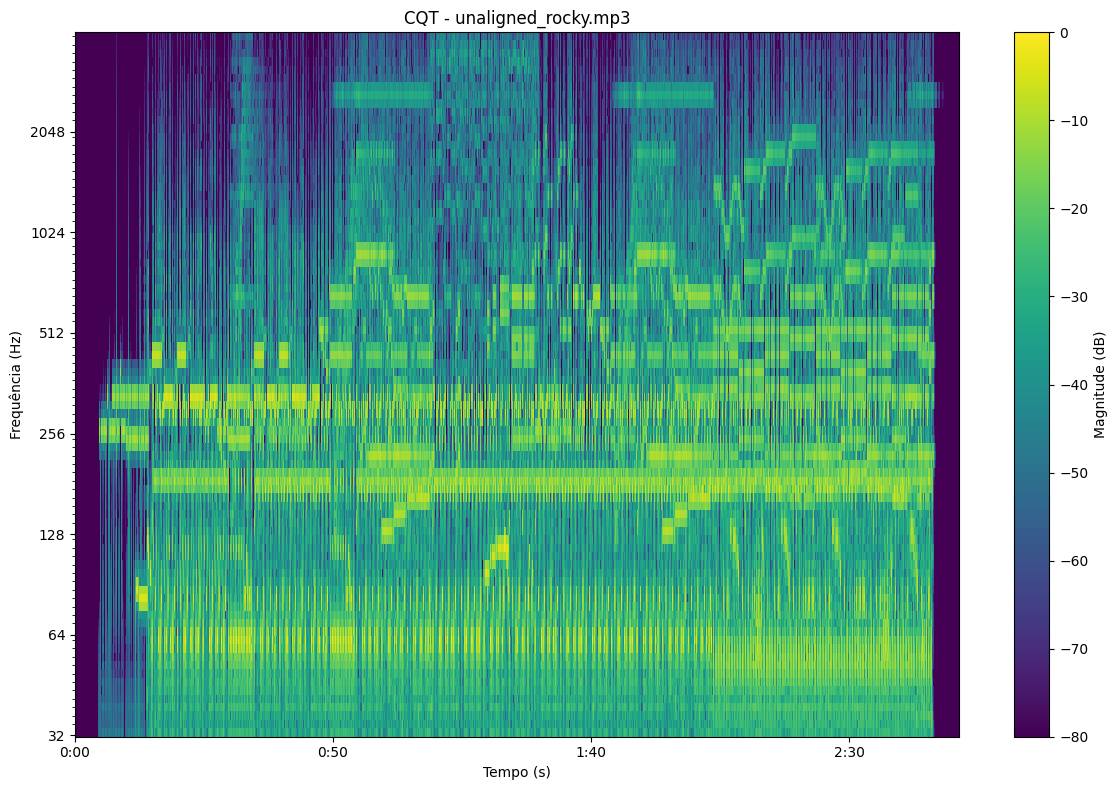


Salvando CQT...
CQT salvo em: unaligned_rocky_cqt.npy

Processamento concluído com sucesso!


In [9]:
# Exemplo de uso do script
if __name__ == "__main__":
    # Configura os arquivos de áudio disponíveis no diretório
    audio_files = [
        "aligned_rocky.mp3",
        "unaligned_rocky.mp3", 
        "unaligned_big_rocky.mp3"
    ]
    
    # Escolha o arquivo que deseja processar
    audio_file = "unaligned_rocky.mp3"  # Altere aqui para o arquivo desejado
    
    try:
        print("=== Gerador de CQT ===")
        print(f"Processando: {audio_file}")
        print()
        
        # Gera o CQT
        cqt, sr, times = generate_cqt(
            audio_file_path=audio_file,
            sr=22050,           # Taxa de amostragem
            hop_length=512,     # Tamanho do hop
            fmin=librosa.note_to_hz('C1'),  # Frequência mínima (C1)
            n_bins=84,          # 7 oitavas × 12 semitons
            bins_per_octave=12  # Um bin por semitom
        )
        
        print()
        print("=== Informações do CQT ===")
        print(f"Forma da matriz: {cqt.shape}")
        print(f"Tipo de dados: {cqt.dtype}")
        print(f"Duração total: {times[-1]:.3f} segundos ({times[-1]*1000:.1f} ms)")
        print(f"Resolução temporal: {(times[1] - times[0])*1000:.2f} ms por frame")
        
        # Visualiza o CQT
        print()
        print("Gerando visualização...")
        visualize_cqt(cqt, sr, times, 
                     fmin=librosa.note_to_hz('C1'), 
                     title=f"CQT - {audio_file}")
        
        # Salva o CQT em diferentes formatos
        base_name = Path(audio_file).stem
        print()
        print("Salvando CQT...")
        
        # Salva como numpy array (formato completo)
        save_cqt(cqt, f"{base_name}_cqt", format='npy')
        
        
        print()
        print("Processamento concluído com sucesso!")
        
    except FileNotFoundError as e:
        print(f"Erro: {e}")
        print("Arquivos disponíveis no diretório:")
        for file in audio_files:
            if os.path.exists(file):
                print(f"  ✓ {file}")
            else:
                print(f"  ✗ {file} (não encontrado)")
                
    except Exception as e:
        print(f"Erro inesperado: {e}")


=== Gerador de CQT ===
Processando: unaligned_big_rocky.mp3

Carregando áudio: unaligned_big_rocky.mp3
Duração: 189.77 segundos
Taxa de amostragem: 22050 Hz
Calculando CQT...
- Frequência mínima: 32.70 Hz
- Número de bins: 84
- Bins por oitava: 12
CQT calculado com sucesso!
Forma do CQT: (84, 8173)

=== Informações do CQT ===
Forma da matriz: (84, 8173)
Tipo de dados: complex64
Duração total: 189.753 segundos (189753.5 ms)
Resolução temporal: 23.22 ms por frame

Gerando visualização...


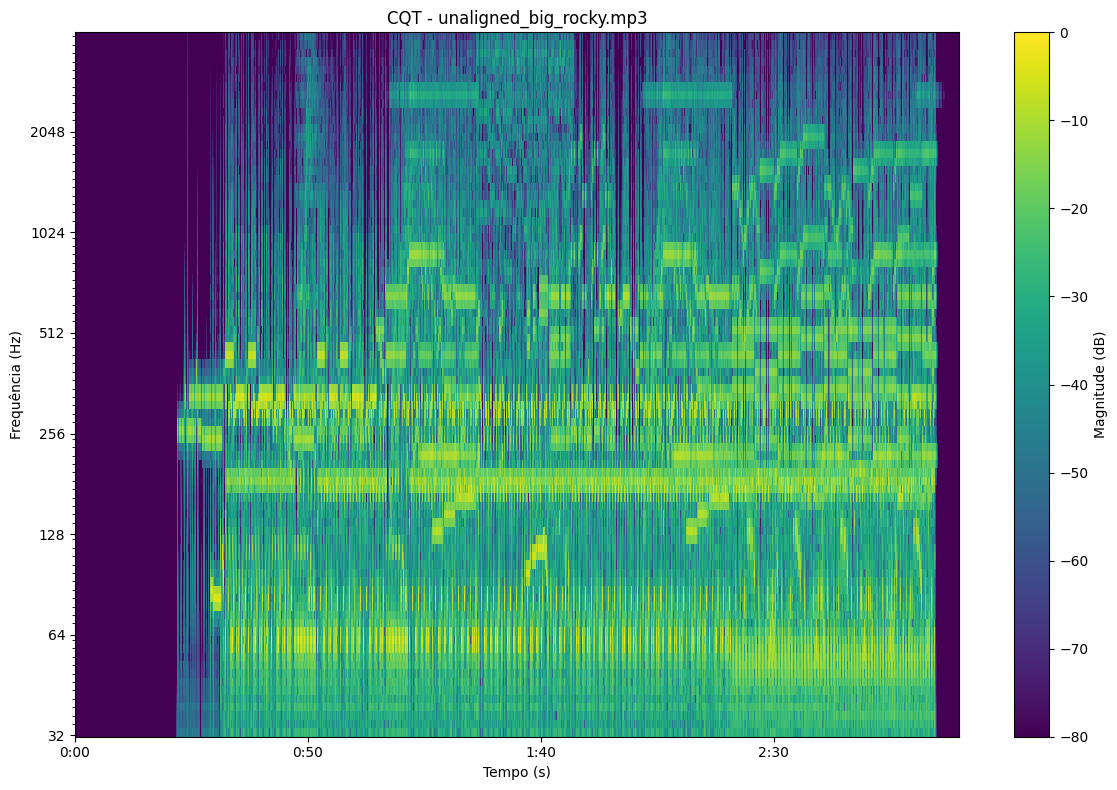


Salvando CQT...
CQT salvo em: unaligned_big_rocky_cqt.npy

Processamento concluído com sucesso!


In [15]:
audio_file = "unaligned_big_rocky.mp3"  # Altere aqui para o arquivo desejado
try:
    print("=== Gerador de CQT ===")
    print(f"Processando: {audio_file}")
    print()
    
    # Gera o CQT
    cqt, sr, times = generate_cqt(
        audio_file_path=audio_file,
        sr=22050,           # Taxa de amostragem
        hop_length=512,     # Tamanho do hop
        fmin=librosa.note_to_hz('C1'),  # Frequência mínima (C1)
        n_bins=84,          # 7 oitavas × 12 semitons
        bins_per_octave=12  # Um bin por semitom
    )
    
    print()
    print("=== Informações do CQT ===")
    print(f"Forma da matriz: {cqt.shape}")
    print(f"Tipo de dados: {cqt.dtype}")
    print(f"Duração total: {times[-1]:.3f} segundos ({times[-1]*1000:.1f} ms)")
    print(f"Resolução temporal: {(times[1] - times[0])*1000:.2f} ms por frame")
    
    # Visualiza o CQT
    print()
    print("Gerando visualização...")
    visualize_cqt(cqt, sr, times, 
                    fmin=librosa.note_to_hz('C1'), 
                    title=f"CQT - {audio_file}")
    
    # Salva o CQT em diferentes formatos
    base_name = Path(audio_file).stem
    print()
    print("Salvando CQT...")
    
    # Salva como numpy array (formato completo)
    save_cqt(cqt, f"{base_name}_cqt", format='npy')
    
    
    print()
    print("Processamento concluído com sucesso!")
    
except FileNotFoundError as e:
    print(f"Erro: {e}")
    print("Arquivos disponíveis no diretório:")
    for file in audio_files:
        if os.path.exists(file):
            print(f"  ✓ {file}")
        else:
            print(f"  ✗ {file} (não encontrado)")
            
except Exception as e:
    print(f"Erro inesperado: {e}")

=== Gerador de CQT ===
Processando: aligned_big_rocky.mp3

Carregando áudio: aligned_big_rocky.mp3
Duração: 179.40 segundos
Taxa de amostragem: 22050 Hz
Calculando CQT...
- Frequência mínima: 32.70 Hz
- Número de bins: 84
- Bins por oitava: 12
CQT calculado com sucesso!
Forma do CQT: (84, 7727)

=== Informações do CQT ===
Forma da matriz: (84, 7727)
Tipo de dados: complex64
Duração total: 179.397 segundos (179397.4 ms)
Resolução temporal: 23.22 ms por frame

Gerando visualização...


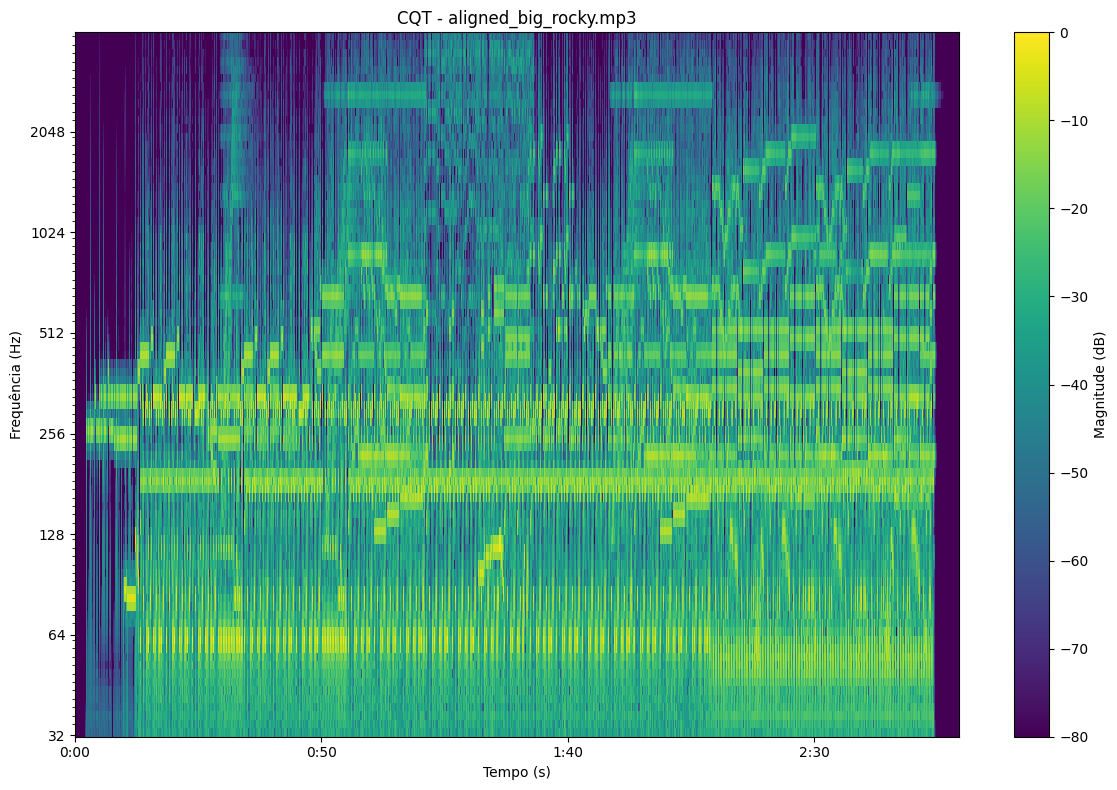


Salvando CQT...
CQT salvo em: aligned_big_rocky_cqt.npy

Processamento concluído com sucesso!


In [4]:
audio_file = "aligned_big_rocky.mp3"  # Altere aqui para o arquivo desejado
try:
    print("=== Gerador de CQT ===")
    print(f"Processando: {audio_file}")
    print()
    
    # Gera o CQT
    cqt, sr, times = generate_cqt(
        audio_file_path=audio_file,
        sr=22050,           # Taxa de amostragem
        hop_length=512,     # Tamanho do hop
        fmin=librosa.note_to_hz('C1'),  # Frequência mínima (C1)
        n_bins=84,          # 7 oitavas × 12 semitons
        bins_per_octave=12  # Um bin por semitom
    )
    
    print()
    print("=== Informações do CQT ===")
    print(f"Forma da matriz: {cqt.shape}")
    print(f"Tipo de dados: {cqt.dtype}")
    print(f"Duração total: {times[-1]:.3f} segundos ({times[-1]*1000:.1f} ms)")
    print(f"Resolução temporal: {(times[1] - times[0])*1000:.2f} ms por frame")
    
    # Visualiza o CQT
    print()
    print("Gerando visualização...")
    visualize_cqt(cqt, sr, times, 
                    fmin=librosa.note_to_hz('C1'), 
                    title=f"CQT - {audio_file}")
    
    # Salva o CQT em diferentes formatos
    base_name = Path(audio_file).stem
    print()
    print("Salvando CQT...")
    
    # Salva como numpy array (formato completo)
    save_cqt(cqt, f"{base_name}_cqt", format='npy')
    
    
    print()
    print("Processamento concluído com sucesso!")
    
except FileNotFoundError as e:
    print(f"Erro: {e}")
    print("Arquivos disponíveis no diretório:")
    for file in audio_files:
        if os.path.exists(file):
            print(f"  ✓ {file}")
        else:
            print(f"  ✗ {file} (não encontrado)")
            
except Exception as e:
    print(f"Erro inesperado: {e}")

# UNALIGNED_BIG_ROCKY: 
## 189.753 - 169.947 = 19.806 time shift
# UNALIGNED_ROCKY: 
## 171.294 - 169.947 = 1.347 time shift